In [7]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.model_selection import train_test_split
sb.set() # set the default Seaborn style for graphics
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder #imported all for testing
from sklearn.compose import ColumnTransformer

TEST_SIZE = 0.2

In [8]:
csv_data = pd.read_csv('./Road Accident Data.csv', low_memory=False)
csv_data['Accident_Severity'] = csv_data['Accident_Severity'].replace(['Fetal'], ['Fatal'])

working_data = pd.DataFrame(csv_data[['Accident_Severity','Weather_Conditions','Light_Conditions','Number_of_Vehicles','Road_Type','Time','Speed_limit','Urban_or_Rural_Area']])

col = 'Accident_Severity'
unique_values = working_data[col].unique()

Serious_data = working_data[working_data['Accident_Severity'] == "Serious"]
slight_data = working_data[working_data['Accident_Severity'] == "Slight"]
fatal_data = working_data[working_data['Accident_Severity'] == "Fatal"]

col = 'Accident_Severity'
unique_values = Serious_data[col].unique()

unique_values = slight_data[col].unique()
unique_values = fatal_data[col].unique()
slight_data = slight_data.sample(4000)
Serious_data = Serious_data.sample(4000)
col = 'Accident_Severity'
unique_values = slight_data[col].unique()
unique_values = Serious_data[col].unique()

combined_df = pd.concat([Serious_data, slight_data, fatal_data], ignore_index=True)
combined_df = combined_df.sample(frac=1)
combined_df.head()

col = 'Accident_Severity'
unique_values = combined_df[col].unique()

data = combined_df.copy() 

In [9]:
X = data[['Weather_Conditions','Light_Conditions','Number_of_Vehicles','Road_Type','Time','Speed_limit','Urban_or_Rural_Area']]
Y = data['Accident_Severity']
#Y['Accident_Severity'] = Y['Accident_Severity'].replace('fetal', 'fatal')
#print(df.columns)
X['Urban_or_Rural_Area'].value_counts()

Urban_or_Rural_Area
Urban    6487
Rural    5466
Name: count, dtype: int64

In [10]:
categorical_features = ['Weather_Conditions', 'Light_Conditions', 'Road_Type', 'Time', 'Urban_or_Rural_Area']
one_hot_encoder = OneHotEncoder()
preprocessor = ColumnTransformer(transformers=[('cat', one_hot_encoder, categorical_features)], remainder='passthrough')
X_encoded = preprocessor.fit_transform(X)

In [11]:
# Extract feature names
if hasattr(preprocessor, 'get_feature_names_out'):
    feature_names = preprocessor.get_feature_names_out()
else:
    feature_names = ['feature'+str(i) for i in range(X_encoded.shape[1])]

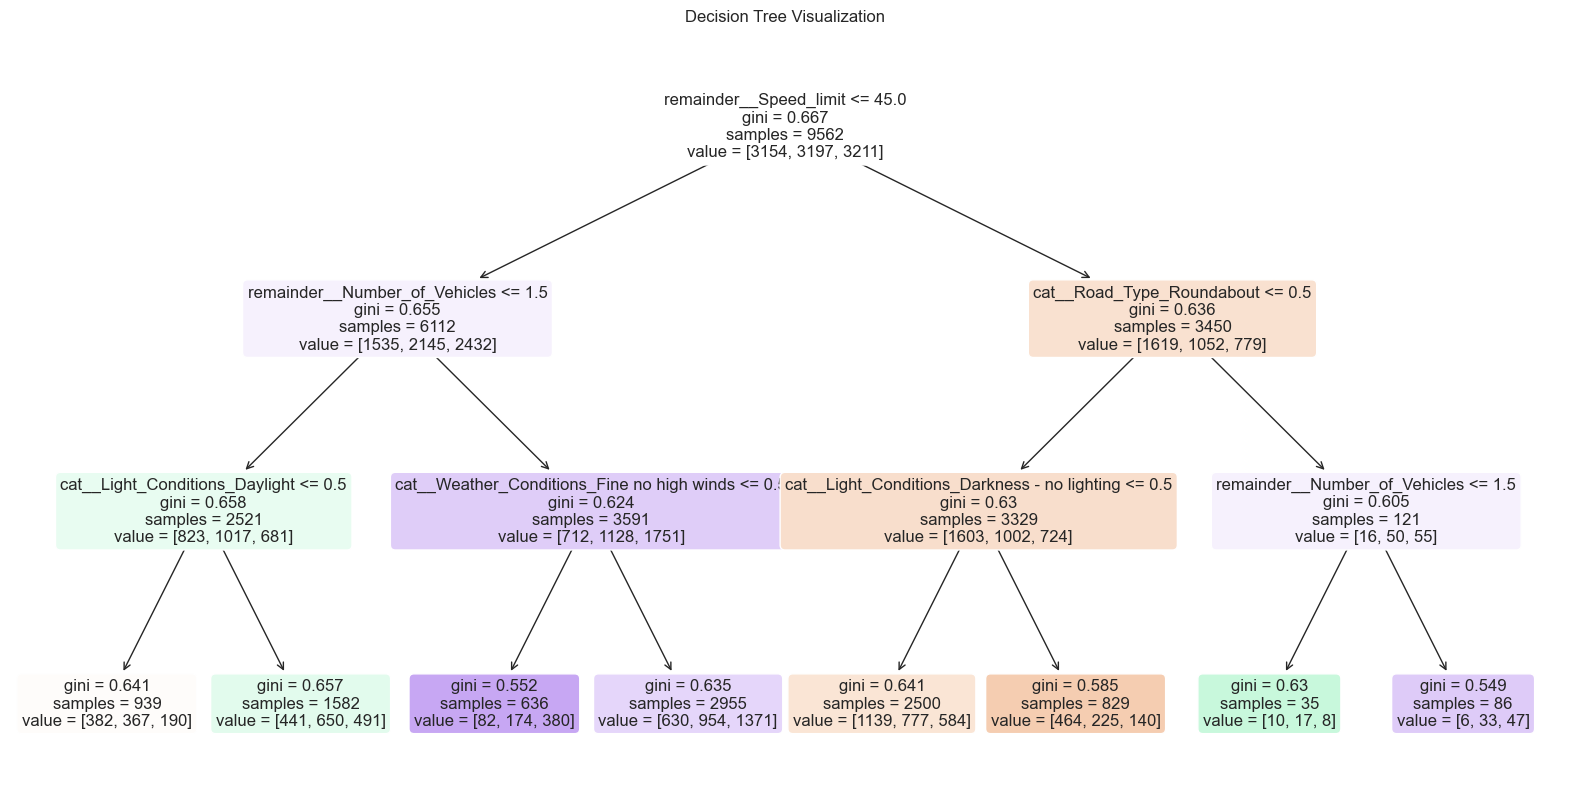

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, Y, test_size=TEST_SIZE, random_state=1) #Random state of one is being used to get reproduceable results
tree_model = DecisionTreeClassifier(max_depth=3) #verbose to monitor progress 
tree_model.fit(X_train, y_train)

#class_names = ['Serious', 'Fetal','Slight']
plt.figure(figsize=(20, 10))  # Set the size of the figure
plot_tree(tree_model, filled=True, feature_names=feature_names.tolist(), fontsize = 12, rounded = True)
plt.title('Decision Tree Visualization')
plt.show()


In [13]:
y_pred = tree_model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

Accuracy: 0.47971560016729403
Classification Report:
              precision    recall  f1-score   support

       Fatal       0.48      0.65      0.55       799
     Serious       0.47      0.24      0.31       803
      Slight       0.49      0.56      0.52       789

    accuracy                           0.48      2391
   macro avg       0.48      0.48      0.46      2391
weighted avg       0.48      0.48      0.46      2391

Confusion Matrix:
[[518  99 182]
 [329 189 285]
 [236 113 440]]


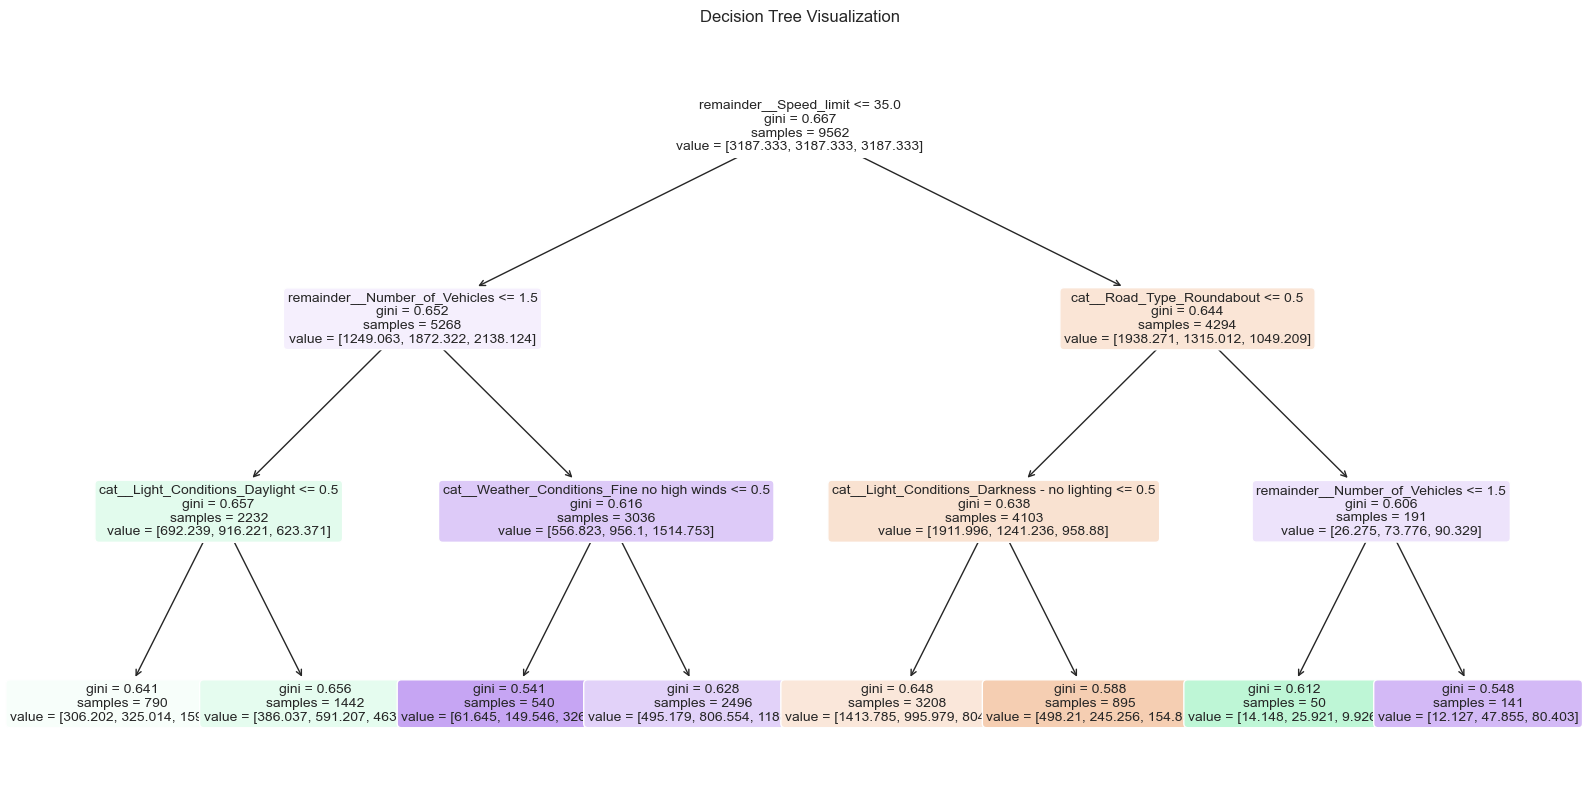

In [14]:
tree_model2 = DecisionTreeClassifier(max_depth=3,class_weight='balanced') #class_weight='balanced' to adjust weights inversely proportional to class frequencies
tree_model2.fit(X_train, y_train)

plt.figure(figsize=(20, 10))  # Set the size of the figure
plot_tree(tree_model2, filled=True, feature_names=feature_names.tolist(), fontsize = 10, rounded = True)
plt.title('Decision Tree Visualization')
plt.show()

In [15]:
y_pred2 = tree_model2.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred2)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred2)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred2)}")

Accuracy: 0.4767879548306148
Classification Report:
              precision    recall  f1-score   support

       Fatal       0.48      0.60      0.53       799
     Serious       0.44      0.32      0.37       803
      Slight       0.50      0.51      0.51       789

    accuracy                           0.48      2391
   macro avg       0.47      0.48      0.47      2391
weighted avg       0.47      0.48      0.47      2391

Confusion Matrix:
[[480 173 146]
 [293 256 254]
 [237 148 404]]
